In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Import The CSV Data as Pandas DataFrame

In [2]:
df=pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

Data Checks To Perform

1.Check Missing Values

2.Check Duplicates

3.check datatype

4.check number of unique values of each column

5.check statistics of data set

6.check various categories present in the different categorical column

Check missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing values

check duplicates

In [6]:
df.duplicated().sum()

0

There is no duplicates in the dataset

Check datatype

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number of unique values in each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Check statistics of dataset

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight:

1.From the above description of numerical data,all means are very close to each other b/w 66 and 68.05

2.All standaed deviations are alse close -b/w 14.6 to 15.19

3.While there is a minimum score 0 for math,for writing minimum is much higher=10 nd for reading  myet higher=17

In [10]:
print("categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())
print()
print("categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())
print()
print("categories in 'parental level of education' variable:  ",end=" ")
print(df['parental level of education'].unique())
print()
print("categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())
print()
print("categories in 'test preparation course' variable:  ",end=" ")
print(df['test preparation course'].unique())

categories in 'gender' variable:   ['female' 'male']

categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']

categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

categories in 'lunch' variable:   ['standard' 'free/reduced']

categories in 'test preparation course' variable:   ['none' 'completed']


In [11]:
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('We have {} numerical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 numerical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Adding columns for total score and average

In [12]:
df['total_marks']=df['math score']+df['reading score']+df['writing score']
df['average_marks']=df['total_marks']/3

In [13]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks,average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


In [14]:
read_full=df[df['reading score']==100]['average_marks'].count()
write_full=df[df['writing score']==100]['average_marks'].count()
math_full=df[df['math score']==100]['average_marks'].count()


print("Number of students who scored full marks in reading: ",read_full)
print("Number of students who scored full marks in writing: ",write_full)
print("Number of students who scored full marks in math: ",math_full)

Number of students who scored full marks in reading:  17
Number of students who scored full marks in writing:  14
Number of students who scored full marks in math:  7


In [15]:
read_less=df[df['reading score']<=20]['average_marks'].count()
write_less=df[df['writing score']<=20]['average_marks'].count()
math_less=df[df['math score']<=20]['average_marks'].count()


print("Number of students who scored less marks in reading: ",read_less)
print("Number of students who scored less marks in writing: ",write_less)
print("Number of students who scored less marks in math: ",math_less)

Number of students who scored less marks in reading:  1
Number of students who scored less marks in writing:  3
Number of students who scored less marks in math:  4


from above values we get students performed the worst in maths

best performance is in reding section

Exploring data(Visualization)

histogram,KDE

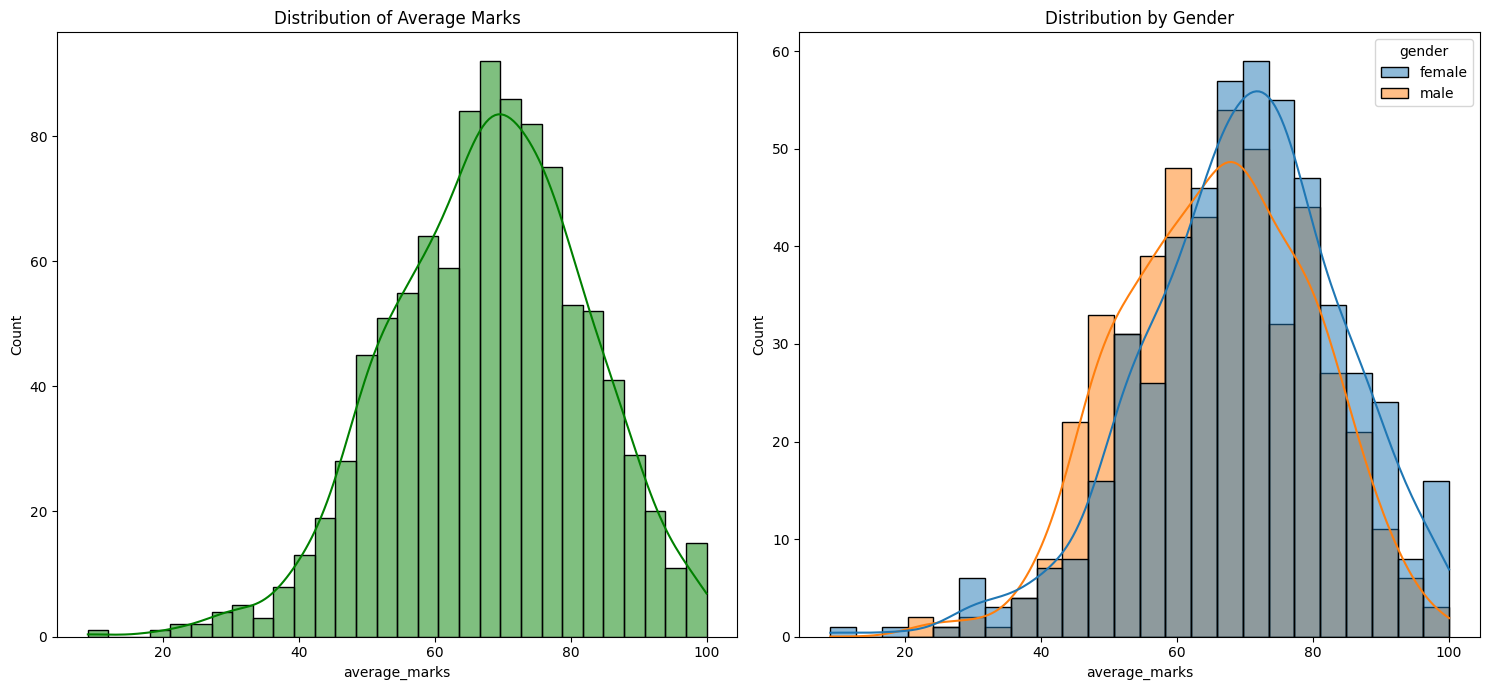

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First plot
sns.histplot(data=df, x='average_marks', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of Average Marks')

# Second plot
sns.histplot(data=df, x='average_marks', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Distribution by Gender')

plt.tight_layout()
plt.show()


Female students are performing well then male students

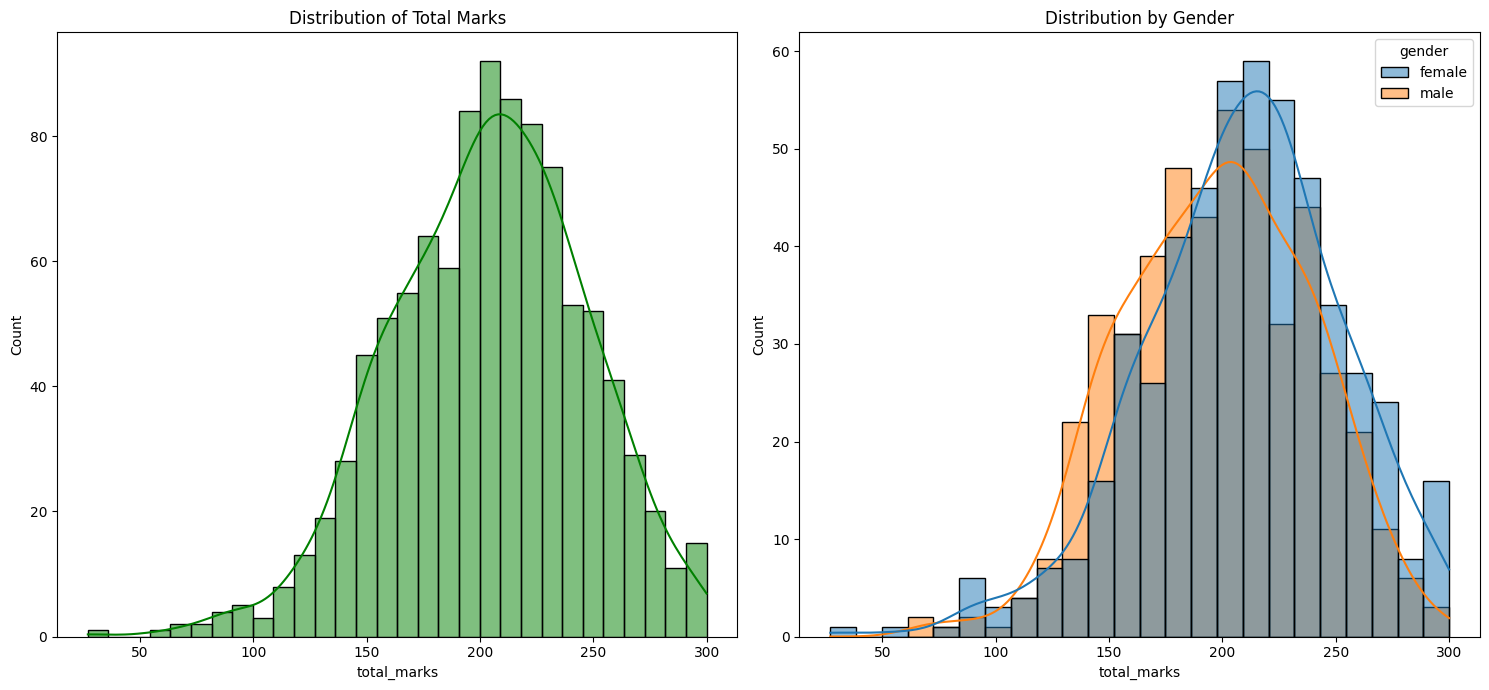

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First plot
sns.histplot(data=df, x='total_marks', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of Total Marks')

# Second plot
sns.histplot(data=df, x='total_marks', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Distribution by Gender')

plt.tight_layout()
plt.show()
